[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0601
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0208
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0138
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0124
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0128
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0098
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0082
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0073
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0077
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0054
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0053
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0059
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0055
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0045
E

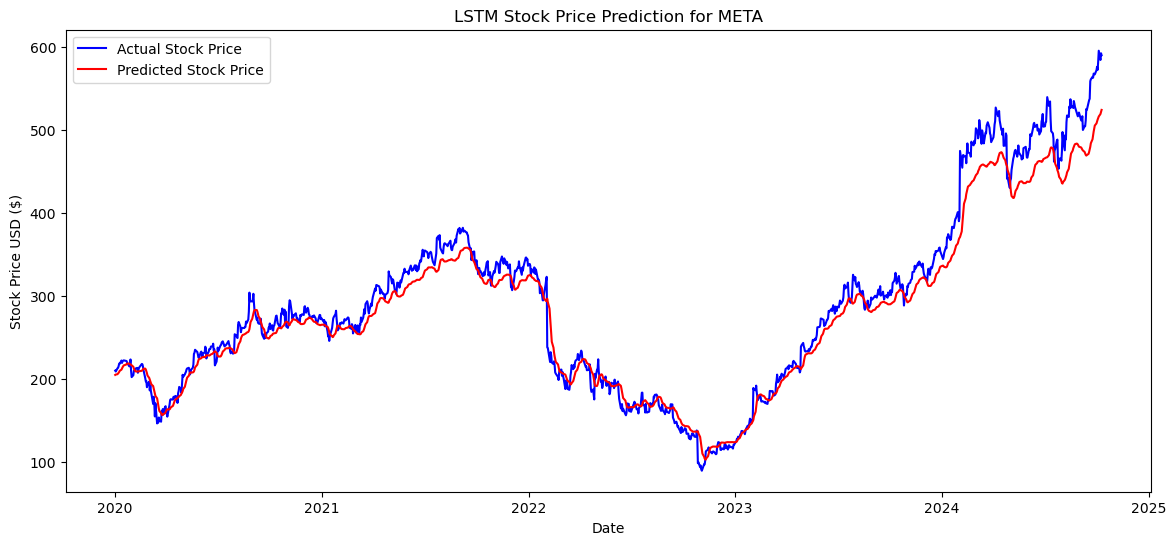

In [6]:
# LSTM Model for Stock Price Prediction

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from math import sqrt
from datetime import datetime

# Load data
ticker = 'META'
start_date = '2019-10-07'
end_date = str(datetime.now().date())

# Download stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocess the data
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.9))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.9))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the full dataset (train + test)
X_full = np.concatenate((X_train, X_test), axis=0)
predicted_prices = model.predict(X_full)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform y (actual prices)
y_full = np.concatenate((y_train, y_test), axis=0)
y_full = scaler.inverse_transform(y_full.reshape(-1, 1))

# Calculate MSE and RMSE
mse = mean_squared_error(y_full, predicted_prices)
rmse = sqrt(mse)
print(f'LSTM Model MSE: {mse}')
print(f'LSTM Model RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(data.index[time_step:], y_full, color='blue', label='Actual Stock Price')
plt.plot(data.index[time_step:], predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'LSTM Stock Price Prediction for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0292
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0048
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0034
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0031
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0031
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0024
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0024
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0025
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0024
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0023
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0020
E

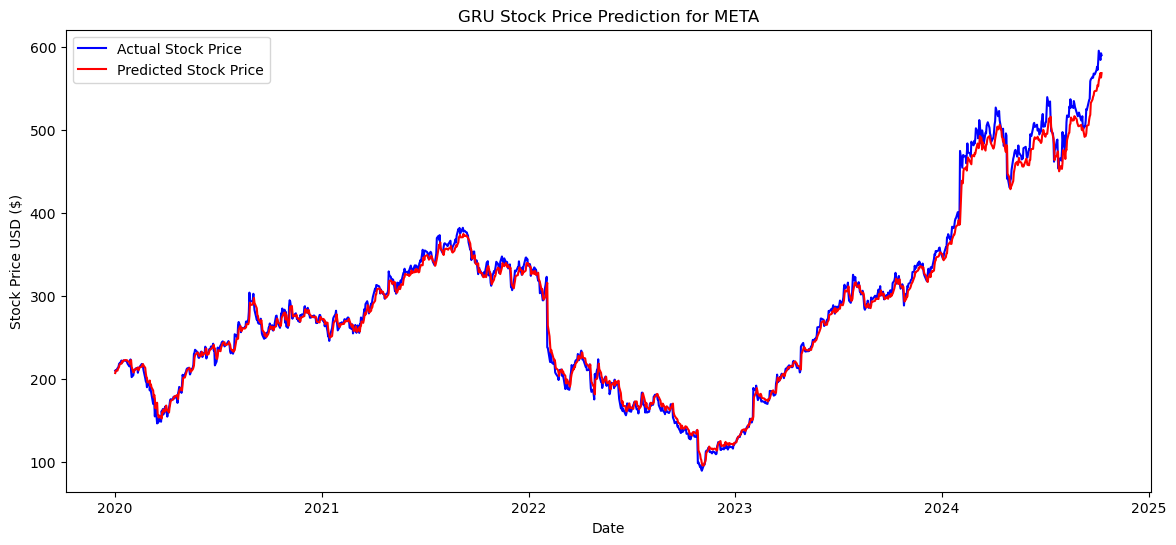

In [5]:
# GRU Model for Stock Price Prediction

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from math import sqrt
from datetime import datetime

# Load data
ticker = 'META'
start_date = '2019-10-07'
end_date = str(datetime.now().date())

# Download stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocess the data
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.6))
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.6))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the full dataset (train + test)
X_full = np.concatenate((X_train, X_test), axis=0)
predicted_prices = model.predict(X_full)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform y (actual prices)
y_full = np.concatenate((y_train, y_test), axis=0)
y_full = scaler.inverse_transform(y_full.reshape(-1, 1))

# Calculate MSE and RMSE
mse = mean_squared_error(y_full, predicted_prices)
rmse = sqrt(mse)
print(f'GRU Model MSE: {mse}')
print(f'GRU Model RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(data.index[time_step:], y_full, color='blue', label='Actual Stock Price')
plt.plot(data.index[time_step:], predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'GRU Stock Price Prediction for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0879
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0161
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0116
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.0090
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.0077
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.0074
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0066
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.0074
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.0062
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.0061
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0059
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.0052
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.0052
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.0055
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.0051


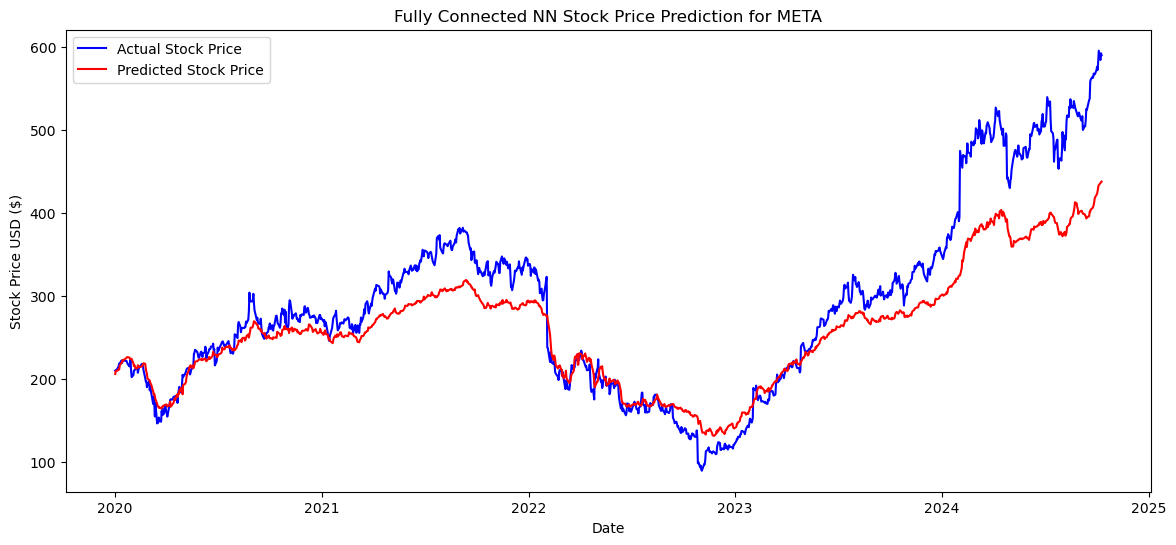

In [13]:
# Fully Connected NN Model for Stock Price Prediction

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from math import sqrt
from datetime import datetime

# Load data
ticker = 'META'
start_date = '2019-10-07'
end_date = str(datetime.now().date())

# Download stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Preprocess the data
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for Fully Connected NN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Build Fully Connected NN model
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the full dataset (train + test)
X_full = np.concatenate((X_train, X_test), axis=0)
predicted_prices = model.predict(X_full)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform y (actual prices)
y_full = np.concatenate((y_train, y_test), axis=0)
y_full = scaler.inverse_transform(y_full.reshape(-1, 1))

# Calculate MSE and RMSE
mse = mean_squared_error(y_full, predicted_prices)
rmse = sqrt(mse)
print(f'Fully Connected NN Model MSE: {mse}')
print(f'Fully Connected NN Model RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(data.index[time_step:], y_full, color='blue', label='Actual Stock Price')
plt.plot(data.index[time_step:], predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'Fully Connected NN Stock Price Prediction for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


Epoch 1/100, Loss: 0.15170989396099008, Time: 1.95s
Epoch 2/100, Loss: 0.15170989396099008, Time: 1.99s
Epoch 3/100, Loss: 0.15170989396099008, Time: 1.89s
Epoch 4/100, Loss: 0.15170989396099008, Time: 1.83s
Epoch 5/100, Loss: 0.15170989396099008, Time: 1.82s
Epoch 6/100, Loss: 0.15170989396099008, Time: 1.89s
Epoch 7/100, Loss: 0.15170989396099008, Time: 1.83s
Epoch 8/100, Loss: 0.15170989396099008, Time: 1.93s
Epoch 9/100, Loss: 0.15170989396099008, Time: 1.95s
Epoch 10/100, Loss: 0.15170989396099008, Time: 2.02s
Epoch 11/100, Loss: 0.15170989396099008, Time: 1.97s
Epoch 12/100, Loss: 0.15170989396099008, Time: 1.90s
Epoch 13/100, Loss: 0.15170989396099008, Time: 1.97s
Epoch 14/100, Loss: 0.15170989396099008, Time: 2.10s
Epoch 15/100, Loss: 0.15170989396099008, Time: 1.88s
Epoch 16/100, Loss: 0.15170989396099008, Time: 1.91s
Epoch 17/100, Loss: 0.15170989396099008, Time: 1.90s
Epoch 18/100, Loss: 0.15170989396099008, Time: 1.87s
Epoch 19/100, Loss: 0.15170989396099008, Time: 1.92s
Ep

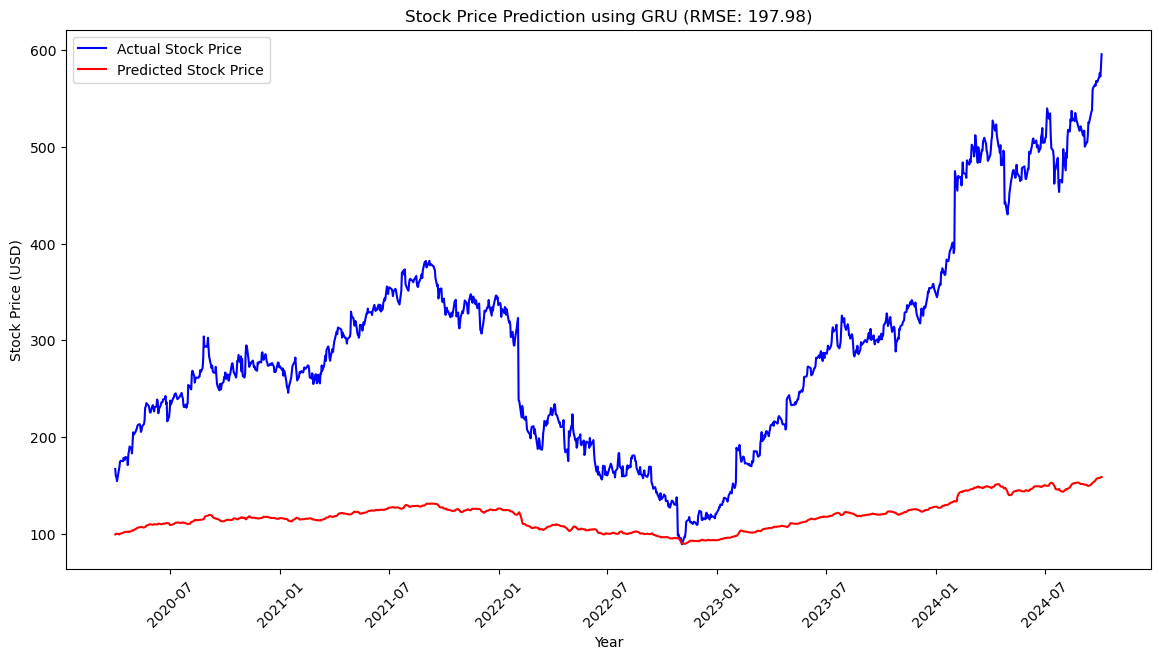

In [15]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time  # Import the time module to measure epoch duration

# Download historical data for META
data = yf.download('META', start='2019-10-07', end='2024-10-07')

# Extract the 'Close' prices and corresponding dates
close_prices = data['Close'].values
dates = data.index  # This gives us the corresponding dates for the x-axis

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

# Create training and testing datasets
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 120
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Xavier Initialization
def xavier_init(shape):
    return np.random.randn(*shape) * np.sqrt(2 / sum(shape))

# Adam Optimizer with Gradient Clipping
class AdamOptimizer:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0

    def update(self, param, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        param -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return param

    def clip_grads(self, grad, clip_value=1.0):
        return np.clip(grad, -clip_value, clip_value)

# Define the GRU class with Xavier initialization and gradient clipping
class GRU:
    def __init__(self, input_size, hidden_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.Wz = xavier_init((hidden_size, input_size))
        self.Uz = xavier_init((hidden_size, hidden_size))
        self.bz = np.zeros((hidden_size, 1))
        
        self.Wr = xavier_init((hidden_size, input_size))
        self.Ur = xavier_init((hidden_size, hidden_size))
        self.br = np.zeros((hidden_size, 1))
        
        self.Wh = xavier_init((hidden_size, input_size))
        self.Uh = xavier_init((hidden_size, hidden_size))
        self.bh = np.zeros((hidden_size, 1))

        # Adam optimizers for each parameter
        self.optim_Wz = AdamOptimizer(learning_rate)
        self.optim_Uz = AdamOptimizer(learning_rate)
        self.optim_bz = AdamOptimizer(learning_rate)
        
        self.optim_Wr = AdamOptimizer(learning_rate)
        self.optim_Ur = AdamOptimizer(learning_rate)
        self.optim_br = AdamOptimizer(learning_rate)
        
        self.optim_Wh = AdamOptimizer(learning_rate)
        self.optim_Uh = AdamOptimizer(learning_rate)
        self.optim_bh = AdamOptimizer(learning_rate)

    def forward(self, x_t, h_prev):
        x_t = x_t.reshape(self.input_size, 1)  # Shape (1, 1)
        h_prev = h_prev.reshape(self.hidden_size, 1)  # Shape (hidden_size, 1)

        z_t = self.sigmoid(np.dot(self.Wz, x_t) + np.dot(self.Uz, h_prev) + self.bz)
        r_t = self.sigmoid(np.dot(self.Wr, x_t) + np.dot(self.Ur, h_prev) + self.br)
        h_hat = np.tanh(np.dot(self.Wh, x_t) + np.dot(self.Uh, r_t * h_prev) + self.bh)
        h_t = (1 - z_t) * h_prev + z_t * h_hat
        return h_t

    def backward(self, grad_h, h_prev):
        # Backpropagation placeholder
        pass

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Training the GRU model with Adam optimizer and gradient clipping
def train_gru(X, y, hidden_size=50, epochs=100, learning_rate=0.01):
    input_size = X.shape[2]  # Should be 1
    gru = GRU(input_size, hidden_size, learning_rate)
    h_prev = np.zeros((hidden_size, 1))  # Initialize hidden state to zeros
    loss_history = []
    
    for epoch in range(epochs):
        start_time = time.time()  # Start timing the epoch
        epoch_loss = 0
        for i in range(X.shape[0]):
            h_prev = np.zeros((hidden_size, 1))  # Reset hidden state at the beginning of each sequence
            for t in range(time_step):
                x_t = X[i, t]  # Shape (1,) for each time step
                x_t = np.expand_dims(x_t, axis=0)  # Make it (1, 1) to pass to the GRU
                h_prev = gru.forward(x_t, h_prev)

            y_t = y[i]  # Target value for the sequence
            loss = np.square(y_t - h_prev[-1, 0])  # Use the last element of the hidden state
            epoch_loss += loss

        end_time = time.time()  # End timing the epoch
        epoch_duration = end_time - start_time  # Calculate epoch duration

        loss_history.append(epoch_loss / X.shape[0])
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / X.shape[0]}, Time: {epoch_duration:.2f}s')

    return gru, loss_history

# RMSE Calculation Function
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Train the model
gru_model, loss_history = train_gru(X, y)

# Make predictions
predicted_stock_price = []
for i in range(len(X)):
    h_prev = np.zeros((gru_model.hidden_size, 1))  # Reset hidden state for each prediction
    for t in range(time_step):
        x_t = X[i, t]  # Shape (1,)
        x_t = np.expand_dims(x_t, axis=0)  # Make it (1, 1)
        h_prev = gru_model.forward(x_t, h_prev)
    predicted_stock_price.append(h_prev[-1, 0])  # Use the last element of h_prev for prediction

# Inverse transform the predictions
predicted_stock_price = scaler.inverse_transform(np.array(predicted_stock_price).reshape(-1, 1))

# Prepare actual stock price for plotting
actual_stock_price = close_prices[time_step + 1:]

# Calculate RMSE
rmse_value = calculate_rmse(actual_stock_price, predicted_stock_price)
print(f'RMSE: {rmse_value}')

# Plotting the results with dates as x-axis
plt.figure(figsize=(14, 7))
plt.plot(dates[time_step + 1:], actual_stock_price, color='blue', label='Actual Stock Price')
plt.plot(dates[time_step + 1:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'Stock Price Prediction using GRU (RMSE: {rmse_value:.2f})')
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()